<a href="https://colab.research.google.com/github/Dennieeeee/ANZ-Customer-Transaction-Analysis/blob/main/Predictive_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/Dennieeeee/ANZ-Customer-Transaction-Analysis/main/Data/ANZ_clean.csv')

In [3]:
df.describe()

,card_present_flag,balance,age,amount,longitude,latitude
count,7407.000000,7407.000000,7407.000000,7407.000000,7407.000000,7407.000000
mean,0.802754,12010.448514,30.102066,28.113021,143.353844,-32.782129
std,0.397946,26235.607336,9.482654,26.630154,12.105135,5.280098
min,0.000000,0.240000,18.000000,4.720000,113.830000,-43.310000
25%,1.000000,2776.165000,23.000000,12.370000,144.640000,-37.710000
50%,1.000000,5361.680000,27.000000,19.700000,145.750000,-33.840000
75%,1.000000,10429.680000,38.000000,32.985000,151.210000,-30.335000
max,1.000000,267093.660000,78.000000,201.600000,153.610000,-12.330000


In [4]:
df.head(1)

,status,card_present_flag,balance,date,first_name,country,merchant_long_lat,gender,age,merchant_suburb,merchant_state,amount,customer_id,movement,longitude,latitude,weekday,month
0,authorized,1.0,35.39,2018-08-01,Diana,Australia,153.38 -27.99,F,26,Ashmore,QLD,16.25,CUS-2487424745,debit,153.38,-27.99,Wednesday,August


## More Data Cleansing

Balance

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


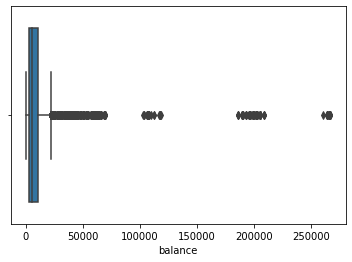

In [5]:
sns.boxplot(df['balance'])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


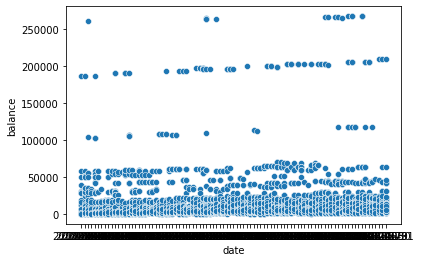

In [6]:
sns.scatterplot('date','balance',data=df)

In [7]:
df=df[df['balance']<100000]

amount

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


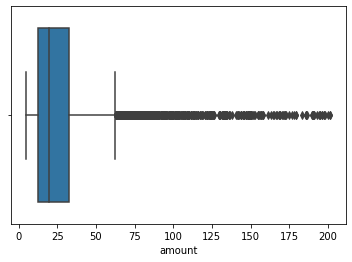

In [8]:
sns.boxplot(df['amount'])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


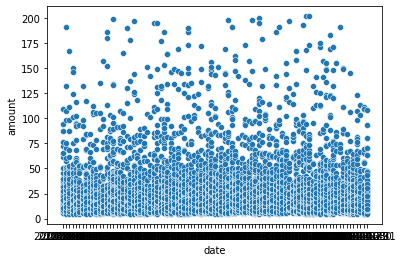

In [9]:
sns.scatterplot('date','amount',data=df)

In [10]:
#remove amount > 100
df = df[df['amount']<100]

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


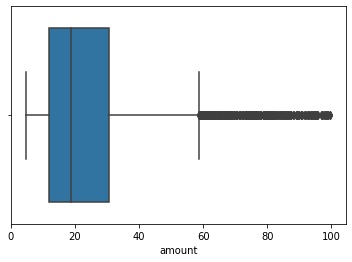

In [11]:
sns.boxplot(df['amount'])

Age

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


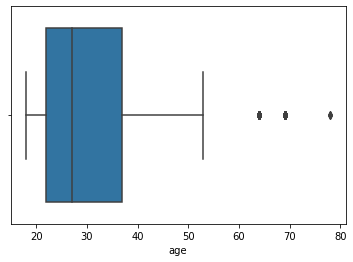

In [12]:
sns.boxplot(df['age'])

In [13]:
df = df[df['age']<60]

## EDA

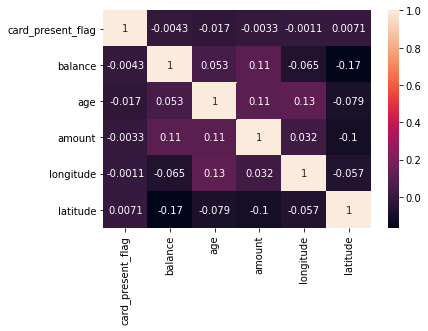

In [14]:
sns.heatmap(df.corr(), annot=True)

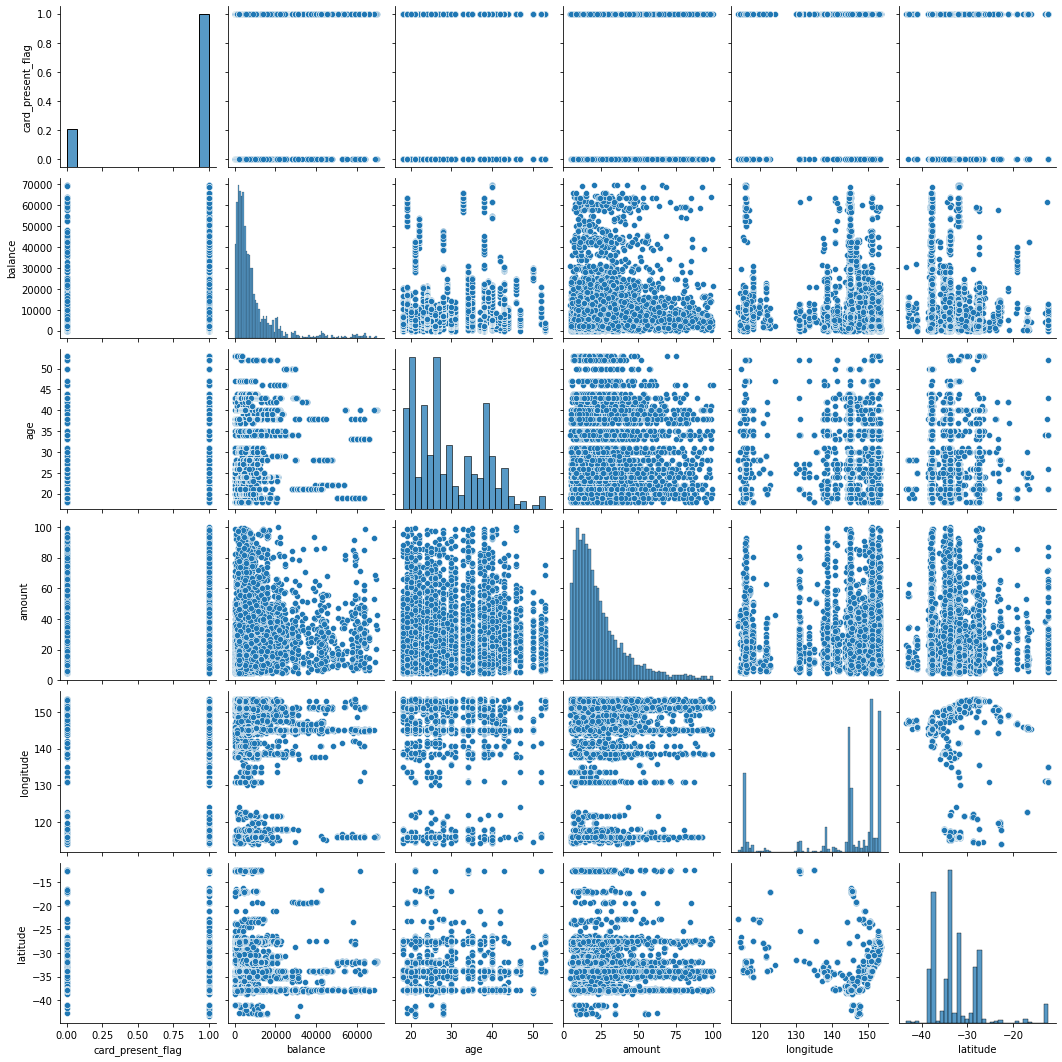

In [15]:
sns.pairplot(df)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


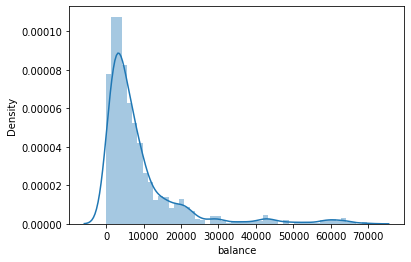

In [16]:
sns.distplot(df['balance'])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


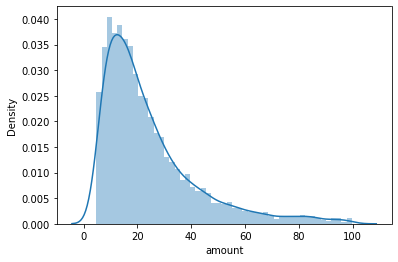

In [17]:
sns.distplot(df['amount'])

# Model Development

## Train Test Split

In [18]:
X = df[['card_present_flag', 'age', 'amount', 'longitude', 'latitude']]
y = df['balance']

In [19]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.4, random_state=101)

## Creating and Train the Model

In [20]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Model Evaluation

In [21]:
# print the intercept
print(lm.intercept_)

7396.3733152763925


In [22]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
card_present_flag,149.421993
age,52.348675
amount,57.606081
longitude,-87.293780
latitude,-338.843845


## Model Prediction

In [23]:
predictions = lm.predict(X_test)

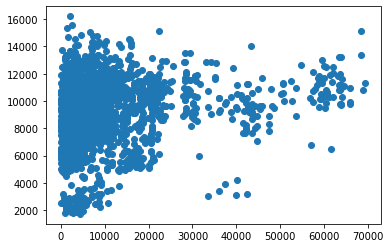

In [24]:
plt.scatter(y_test,predictions)

<strong>Residual Histogram</strong>

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


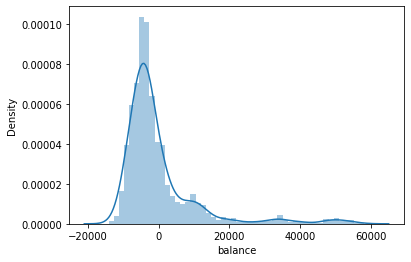

In [25]:
sns.distplot((y_test-predictions),bins=50);

In [26]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 7029.245841793069
MSE: 123819903.51856785
RMSE: 11127.439216574847
